In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.drop(["PassengerId",'Name',"SibSp","Parch","Ticket","Cabin","Embarked"],axis="columns",inplace=True)

In [4]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [5]:
df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
Fare        False
dtype: bool

In [6]:
age_mean=df["Age"].mean()
df.fillna(age_mean,inplace=True)

In [7]:
df.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
Fare        False
dtype: bool

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()

In [10]:
sex=le.fit_transform(df["Sex"])

In [11]:
df["sex"]=sex

In [12]:
df

,Survived,Pclass,Sex,Age,Fare,sex
0,0,3,male,22.000000,7.2500,1
1,1,1,female,38.000000,71.2833,0
2,1,3,female,26.000000,7.9250,0
3,1,1,female,35.000000,53.1000,0
4,0,3,male,35.000000,8.0500,1
...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,1
887,1,1,female,19.000000,30.0000,0
888,0,3,female,29.699118,23.4500,0
889,1,1,male,26.000000,30.0000,1


In [13]:
df.drop("Sex",axis="columns",inplace=True)

In [14]:
df

,Survived,Pclass,Age,Fare,sex
0,0,3,22.000000,7.2500,1
1,1,1,38.000000,71.2833,0
2,1,3,26.000000,7.9250,0
3,1,1,35.000000,53.1000,0
4,0,3,35.000000,8.0500,1
...,...,...,...,...,...
886,0,2,27.000000,13.0000,1
887,1,1,19.000000,30.0000,0
888,0,3,29.699118,23.4500,0
889,1,1,26.000000,30.0000,1


In [15]:
X=df.drop("Survived",axis="columns")

In [16]:
X

,Pclass,Age,Fare,sex
0,3,22.000000,7.2500,1
1,1,38.000000,71.2833,0
2,3,26.000000,7.9250,0
3,1,35.000000,53.1000,0
4,3,35.000000,8.0500,1
...,...,...,...,...
886,2,27.000000,13.0000,1
887,1,19.000000,30.0000,0
888,3,29.699118,23.4500,0
889,1,26.000000,30.0000,1


In [17]:
y=df["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
model=DecisionTreeClassifier()

In [20]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3)

In [21]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
model.score(X_test,y_test)

0.746268656716418

In [27]:
classifier=DecisionTreeClassifier(max_depth=2)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [28]:
import matplotlib.pyplot as plt
from sklearn import tree

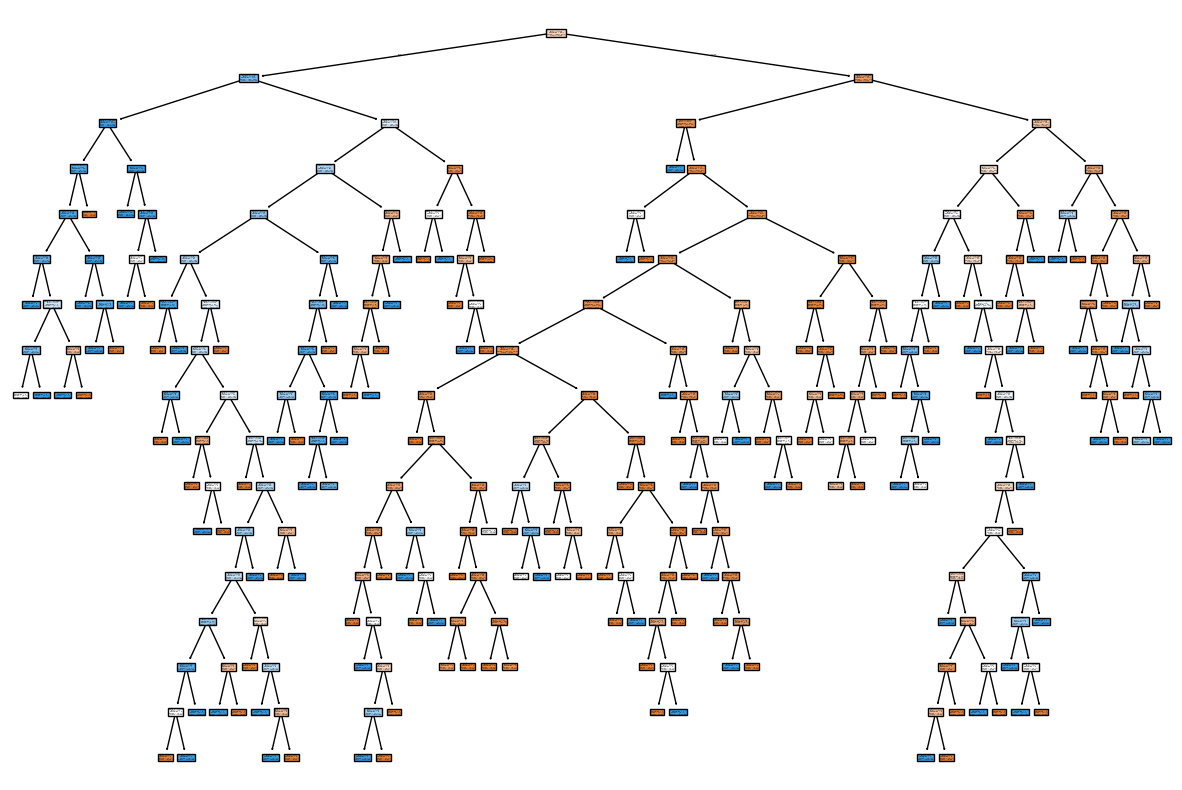

In [29]:
fig=plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True,feature_names=X.columns,class_names=["Died","Survived"])
plt.show()